In [2]:
import numpy as np
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio

C:\Users\PC\AppData\Local\Temp\ipykernel_3408\165178017.py:21: UserWarning: Parsing '26-02-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  covid_metropolitana['Fecha'] = pd.to_datetime(covid_metropolitana['Fecha'])
C:\Users\PC\AppData\Local\Temp\ipykernel_3408\165178017.py:21: UserWarning: Parsing '27-02-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  covid_metropolitana['Fecha'] = pd.to_datetime(covid_metropolitana['Fecha'])
C:\Users\PC\AppData\Local\Temp\ipykernel_3408\165178017.py:21: UserWarning: Parsing '28-02-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  covid_metropolitana['Fecha'] = pd.to_datetime(covid_metropolitana['Fecha'])
C:\Users\PC\AppData\Local\Temp\ipykernel_3408\165178017.py:21: UserWarning: Parsing '29-02-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for co

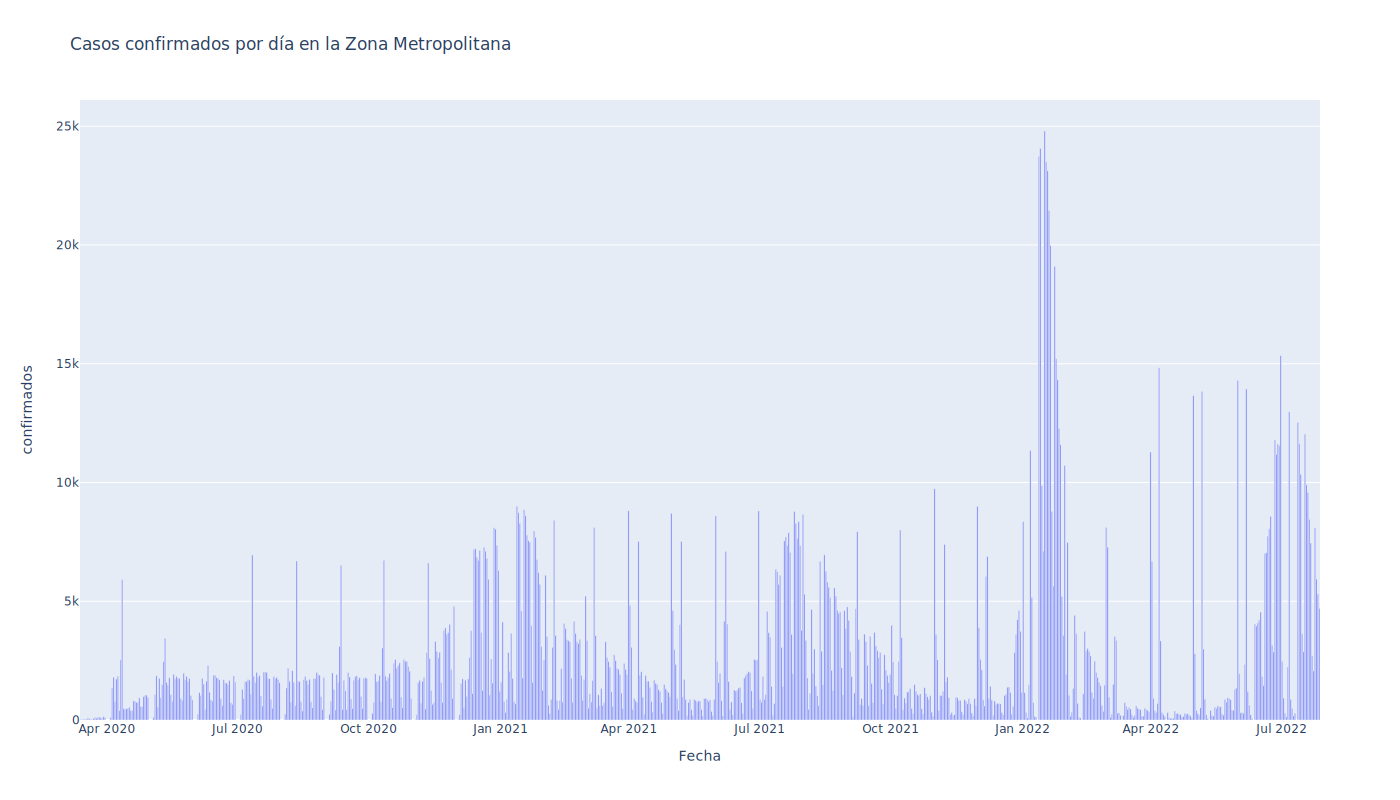

In [3]:
#Leemos el dataset
ruta = 'https://raw.githubusercontent.com/Alberto0410/Estimaci-n-de-Par-metros-COVID-M-xico/main/Casos_Diarios_Estado_Nacional_Confirmados_20221122.csv'
df = pd.read_csv(ruta, encoding='latin-1')

#Eliminamos las primeras dos columnas y transponemos la tabla
covid_metropolitana = df.iloc[[6,14]].drop(columns = ['cve_ent', 'poblacion']).transpose()
covid_metropolitana.reset_index(inplace = True)

#Reseteamos los nombres de los indices
covid_metropolitana.columns = ['Fecha' ,'CDMX','EdoMex']
covid_metropolitana = covid_metropolitana[1:]

# #Creamos una columna para los casos acumulados de CDMX y el Estado
covid_metropolitana['confirmados'] = covid_metropolitana['CDMX']+ covid_metropolitana['EdoMex']

# #Borramos las columnas de CDMX y EdoMex
covid_metropolitana.drop(columns = ['CDMX','EdoMex'], inplace = True)


# #Convertimos el indice en formato date.time
covid_metropolitana['Fecha'] = pd.to_datetime(covid_metropolitana['Fecha'])
covid_metropolitana.sort_values('Fecha', inplace = True)


#Seleccionamos los datos desde el 27 de febrero del 2020 hasta el 29 de julio del 2020
metropolitana2020 = covid_metropolitana[(covid_metropolitana['Fecha'] > "2020-03-13") & (covid_metropolitana['Fecha'] < "2022-07-29")]

#Graficamos
title1 = 'Casos confirmados por día en la Zona Metropolitana'
fig = px.bar(metropolitana2020, x = 'Fecha', y = 'confirmados', title = title1, height = 800, width = 1400)
fig.show(renderer = 'svg') 


        Fecha confirmados  confirmados_prom_mov
18 2020-03-14          27              0.000000
19 2020-03-15          20              0.000000
20 2020-03-16          35              0.000000
21 2020-03-17          44             44.714286
22 2020-03-18          36             45.714286
        Fecha  confirmados_prom_mov
21 2020-03-17             44.714286
22 2020-03-18             45.714286
23 2020-03-19             47.428571
24 2020-03-20             52.428571
25 2020-03-21             61.571429


C:\Users\PC\AppData\Local\Temp\ipykernel_3408\786050086.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



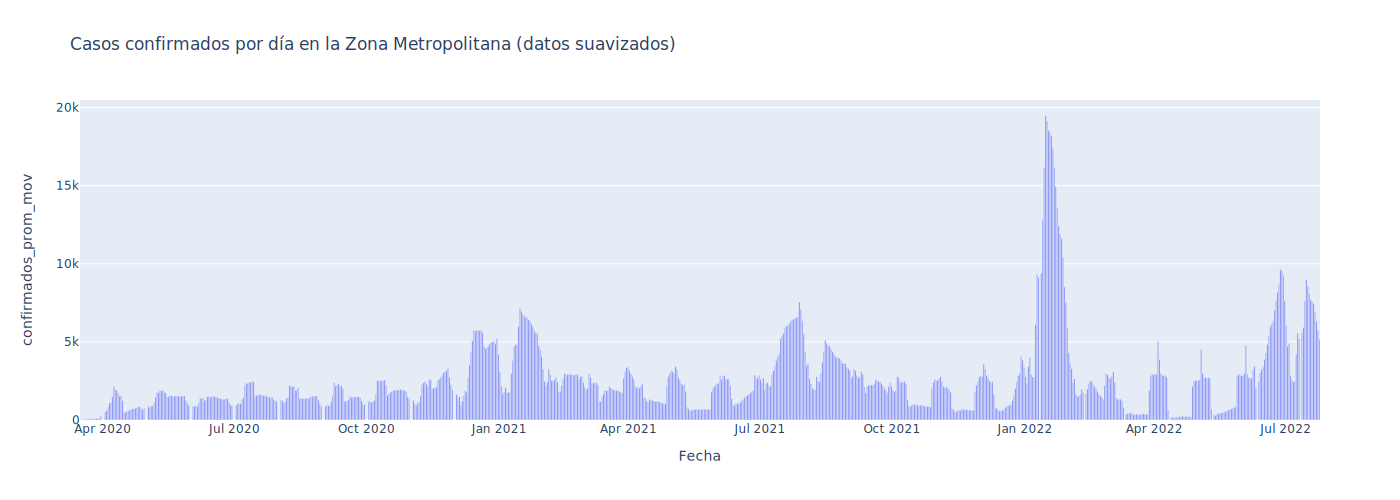

In [4]:
#Obtenemos los datos de los confirmados
casos = metropolitana2020['confirmados'].values

#Creamos un vector donde estaran los datos suavizados
data_suavizado = [0,0,0]

#Calculamos los promedios moviles con k = 3
for i in range(3, len(casos)-3):
    casos_i = casos[i-3:i+4]
    yi = np.mean(casos_i)
    data_suavizado.append(yi)
  
#Anexamos los datos a la tabla metropolitana2020
data_suavizado.extend([0, 0, 0])
data_suavizado = np.array(data_suavizado)

metropolitana2020['confirmados_prom_mov'] = data_suavizado
print(metropolitana2020.head())


covid_suavizado = metropolitana2020[3: -3].drop(columns = ['confirmados'])
print(covid_suavizado.head())

#Graficamos otra vez
title1 = 'Casos confirmados por día en la Zona Metropolitana (datos suavizados)'
fig = px.bar(covid_suavizado, x = 'Fecha', y = 'confirmados_prom_mov', title = title1, height = 500, width = 1400)
fig.show(renderer = 'svg') 

## **Ejercicio 4**

Según los datos presentados por INEGI sabemos que:
"En presentación realizada a funcionarios de la Ciudad de México, José Luis Bonilla Mávil, Director
Regional Centro del INEGI, difundió la información que muestra que a la fecha del levantamiento
del Censo 2020, la población residente en la Ciudad de México era de 9 millones 209 mil 944
personas,[...]" (INEGI,2021)

### Inicio de Medidas de prevención:

"A partir del 26 de marzo se suspendieron las actividades no esenciales del gobierno federal, exceptuando las relacionadas con los servicios de seguridad, salud, energía y limpieza. Se recomienda el estornudo de etiqueta, el lavado de manos constante y la desinfección continua de áreas de uso público. Las personas que tienen los síntomas y se han confirmado con COVID-19 tienen que usar mascarillas faciales para evitar el contagio de otras personas. El personal de atención médica debe portar el equipo necesario de protección personal para evitar contagios al identificar a los pacientes en riesgo y al ser internados en las instalaciones médicas."

### Inicio de Bloqueo Total:

"El 30 de marzo, se decretó una emergencia de salud nacional en México, dada la evolución de casos confirmados y las muertes por la enfermedad. Esto condujo al establecimiento de medidas adicionales para su prevención y control, como la suspensión inmediata de actividades no esenciales en todos los sectores económicos del país durante un mes, hasta el 30 de abril"

### Fin del Bloqueo Total:

"El próximo lunes 1 de junio iniciará lo que el gobierno mexicano llama la “nueva normalidad”, una suerte de fase 4 de la epidemia, que estará regida a partir de un semáforo que servirá de guía para la reapertura de actividades en el país."

### Vida Media del Covid ($ \mu$):

"Se determinó que la vida media de los anticuerpos neutralizantes del SARS-CoV-2 era de 20,4 días." (Barnes, et al.,2021)

Referencia: 

INEGI(29 Enero 2021) *CENSO DE POBLACIÓN Y VIVIENDA 2020* URL:
https://www.inegi.org.mx/contenidos/saladeprensa/boletines/2021/EstSociodemo/ResultCenso2020_CdMx.pdf

Barnes (2021) Determination of neutralising anti-SARS-CoV-2 antibody half-life in COVID-19 convalescent donors URL: https://pubmed.ncbi.nlm.nih.gov/34619377/

Suárez (2020) Epidemiología de COVID-19 en México: del 27 de febrero al 30 de abril de 2020 URL: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7250750/#:~:text=El%20primer%20caso%20o%20caso,Italia%20y%20ten%C3%ADa%20s%C3%ADntomas%20leves.

Pastrana (2020) Termina la Jornada Nacional de Sana Distancia... pero no la emergencia. URL: http://www.cua.uam.mx/news/miscelanea/termina-la-jornada-nacional-de-sana-distancia-pero-no-la-emergencia

# Ejercicio 5

Para hacer una estimación de $N$, el número total de la población, vamos a sumar la población del Estado de México y de la CDMX y dividirlo a la mitad

In [5]:
#Tomamos los datos acumulados
covid_suavizado['acum'] = covid_suavizado['confirmados_prom_mov'].cumsum()

#Aplicamos el ln a los acumulados
covid_suavizado['ln'] = np.log(covid_suavizado['acum'])

#Filtramos las dos primeras semanas a partir del 2020-03-17
dos_sem = covid_suavizado[(covid_suavizado['Fecha'] >= "2020-03-17" ) & (covid_suavizado['Fecha'] <= "2020-03-31")]

#Definimos la recta b + lambda*t
def recta(b, lam, t):
  return b + lam*t

#Funcion a minimizar
def error_recta(params):
  b = params[0]
  lamb = params[1]

  error = 0
  for i in range(len(dos_sem)):
    error += (dos_sem['ln'].values[i] - recta(b, lamb, i))**2

  return error

#Paqueteria para minmizar
from scipy.optimize import minimize
punto_inicial = [0, 1]

#Minimizamos el error
res = minimize(error_recta, punto_inicial)
print(res.x)



[4.46084754 0.21152631]


La recta que mejor ajusta a $\ln(I)$ está dada por:
$$\ln(I) = 4.46084754 + 0.21152631*t$$
Es decir, $b = 4.46084754$ y $\lambda = 0.21152631$
Entonces, el estimador de infectados iniciales es $4$

C:\Users\PC\AppData\Local\Temp\ipykernel_3408\4060813879.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



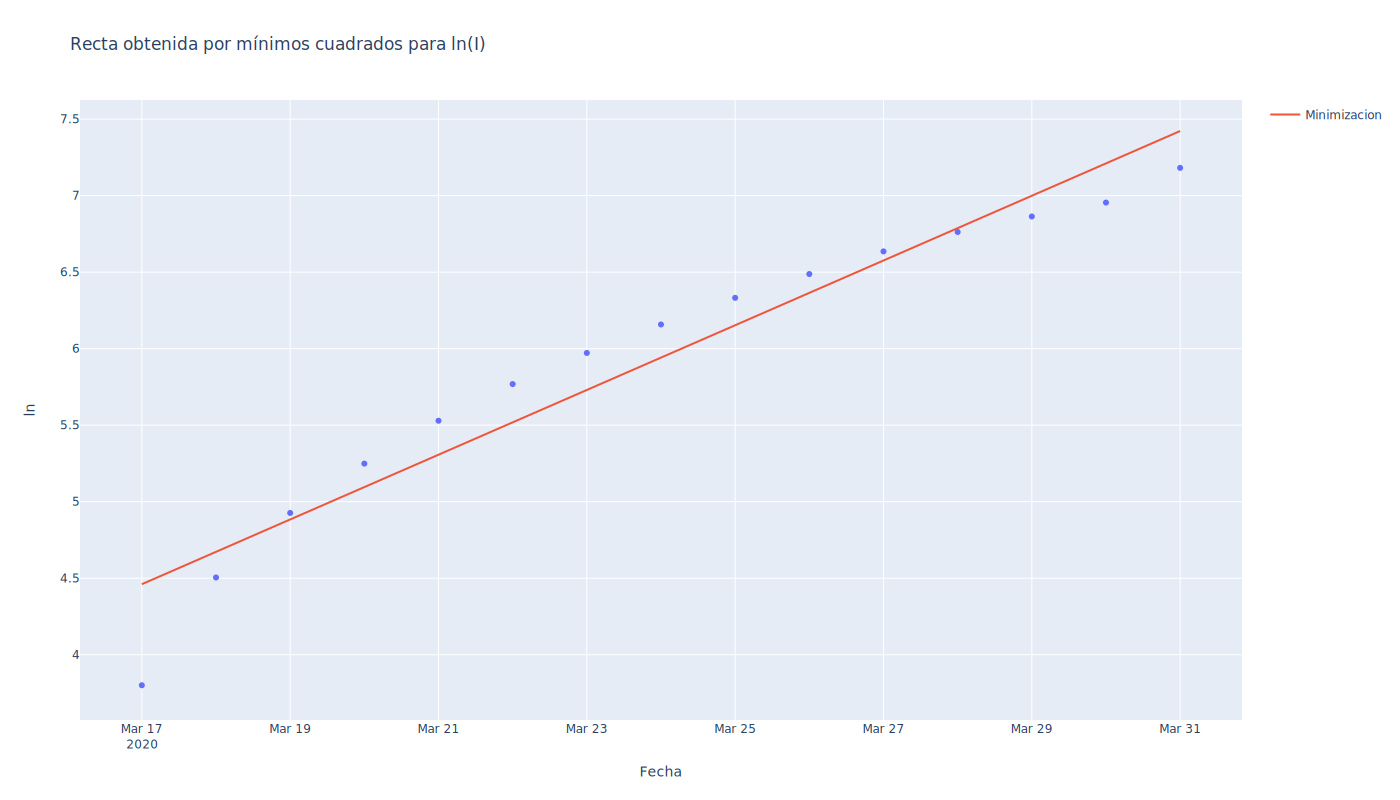

In [6]:
#Graficamos el modelo obtenido y los datos reales
recta_aprox = [recta(res.x[0], res.x[1], i) for i in range(len(dos_sem))]

dos_sem['recta_aprox'] = recta_aprox

title2 = 'Recta obtenida por mínimos cuadrados para ln(I)'
fig = px.scatter(dos_sem, x = 'Fecha', y = 'ln', title = title2, height = 800, width = 1400)
fig.add_scatter(x = dos_sem['Fecha'], y = dos_sem['recta_aprox'], mode = 'lines', name = 'Minimizacion')
fig.show(renderer = 'svg') 

Invest

In [7]:
mu = 20.4
N = 10000000

R0 = (res.x[1] + mu)/mu
S0 = N-res.x[0]


kapa = mu*N*R0/S0
kapa

20.61153550886085

# Ejercicio 6

Ajustamos al modelo $I(t) = I_0e^{\lambda t}$ por minimos cuadrados

In [8]:
def exp(b, lamb, t):
  return b*np.exp(lamb*t)

def error_exp(params):
  b = params[0]
  lamb = params[1]

  error = 0
  for i in range(len(dos_sem)):
    error += (dos_sem['acum'].values[i] - exp(b, lamb, i))**2

  return error

punto_inicial = [0, 1]

#Minimizamos el error
res_exp = minimize(error_exp, punto_inicial)
print(res_exp.x)

[144.08303804   0.15832475]


C:\Users\PC\AppData\Local\Temp\ipykernel_3408\2098941589.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



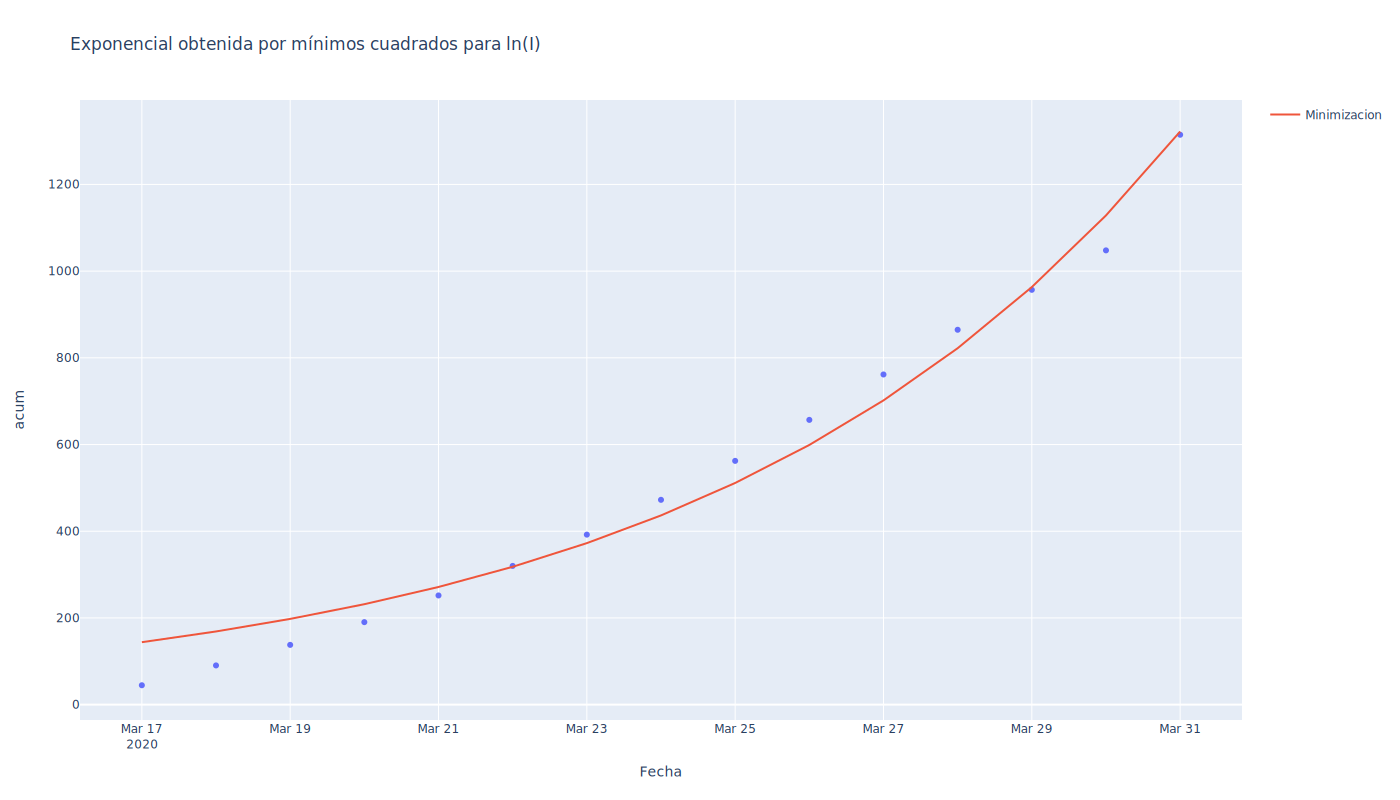

In [9]:
#Graficamos el modelo obtenido y los datos reales
recta_aprox = [exp(res_exp.x[0], res_exp.x[1], i) for i in range(len(dos_sem))]

dos_sem['recta_aprox'] = recta_aprox

title2 = 'Exponencial obtenida por mínimos cuadrados para ln(I)'
fig = px.scatter(dos_sem, x = 'Fecha', y = 'acum', title = title2, height = 800, width = 1400)
fig.add_scatter(x = dos_sem['Fecha'], y = dos_sem['recta_aprox'], mode = 'lines', name = 'Minimizacion')
fig.show(renderer = 'svg') 

In [10]:
mu = 20.4
N = 10000000

R0 = (res_exp.x[1] + mu)/mu
S0 = N-res_exp.x[0]


kapa = mu*N*R0/S0


# Ejercicio 7
Los intervalos tomados son los siguientes:
18 de marzo al 31 de marzo
31 de marzo al 15 de abril
15 de abril al 30 de abril
30 de abril al 15 de mayo

El valo de la tasa de infección $\kappa$ en el intervalos del 18 de marzo al 31 de marzo es $\kappa = 20.558620888726583$

In [11]:
#Filtramos las dos primeras semanas a partir del 2020-03-31
dos_sem1 = covid_suavizado[(covid_suavizado['Fecha'] >= "2020-03-31" ) & (covid_suavizado['Fecha'] <= "2020-04-15")]

#Funcion a minimizar
def error_exp1(params):
  b = params[0]
  lamb = params[1]

  error = 0
  for i in range(len(dos_sem1)):
    error += (dos_sem1['acum'].values[i] - exp(b, lamb, i))**2

  return error

punto_inicial = [0, 1]

#Minimizamos el error
res_dos_sem1 = minimize(error_exp1, punto_inicial)
print(res_dos_sem1.x)



[2.74868172e+03 1.56785262e-01]


In [12]:
#Calculamos kapa
mu = 20.4
N = 10000000

R0 = (res_dos_sem1.x[1] + mu)/mu
S0 = N-res_dos_sem1.x[0]


kapa = mu*N*R0/S0
print(kapa)

20.56243722149729


El valor de $\kappa$ para las semanas del 31 de Marzo al 15 de Abril del 2020 es $\kappa = 20.562437568088463$

In [13]:
#Filtramos las dos primeras semanas a partir del 2020-03-31
dos_sem2 = covid_suavizado[(covid_suavizado['Fecha'] >= "2020-04-15" ) & (covid_suavizado['Fecha'] <= "2020-04-30")]

#Funcion a minimizar
def error_exp2(params):
  b = params[0]
  lamb = params[1]

  error = 0
  for i in range(len(dos_sem2)):
    error += (dos_sem2['acum'].values[i] - exp(b, lamb, i))**2

  return error

punto_inicial = [0, 1]

#Minimizamos el error
res_dos_sem2 = minimize(error_exp2, punto_inicial)
print(res_dos_sem2.x)



[1.88743522e+04 2.97540630e-02]


In [14]:
#Calculamos kapa
mu = 20.4
N = 10000000

R0 = (res_dos_sem2.x[1] + mu)/mu
S0 = N-res_dos_sem2.x[0]


kapa = mu*N*R0/S0
print(kapa)

20.468386817216913


El valor de $\kappa$ para las semanas del 15 de Abril al 30 de Abril del 2020 es $\kappa = 20.468386812440393$

In [15]:
#Filtramos las dos primeras semanas a partir del 2020-03-31
dos_sem3 = covid_suavizado[(covid_suavizado['Fecha'] >= "2020-04-30" ) & (covid_suavizado['Fecha'] <= "2020-05-15")]

#Funcion a minimizar
def error_exp3(params):
  b = params[0]
  lamb = params[1]

  error = 0
  for i in range(len(dos_sem3)):
    error += (dos_sem3['acum'].values[i] - exp(b, lamb, i))**2

  return error

punto_inicial = [0, 1]

#Minimizamos el error
res_dos_sem3 = minimize(error_exp3, punto_inicial)
print(res_dos_sem3.x)



[2.83504694e+04 4.02957837e-02]


In [16]:
#Calculamos kapa
mu = 20.4
N = 10000000

R0 = (res_dos_sem3.x[1] + mu)/mu
S0 = N-res_dos_sem3.x[0]


kapa = mu*N*R0/S0
print(kapa)

20.498409737539763


El valor de $\kappa$ para las semanas del 30 de Abril al 15 de Mayo del 2020 es $\kappa = 20.49840981864042$


Con respecto al modelo SIR, todas las medidas sanitarias para aminorar los
estragos de un brote epidémico están dirigidos, esencialmente, a disminuir la tasa de infección ($\kappa = \text{tasa de contagio}$). 

18 marzo 2020: Se acordó la implementación de una serie de medidas de prevención y control del COVID-19 bajo la denominación de "Jornada Nacional de Sana Distancia". Otras acciones anunciadas incluyen el ajuste del presupuesto gubernamental y la ampliación de programas de gasto social, como acelerar los subsidios a la población de la tercera edad, y otorgarles un apoyo equivalente a cuatro meses de su pensión universal en los próximos meses.

30 marzo 2020: El Consejo de Salubridad General (CSG) decretó una "emergencia sanitaria por causa de fuerza mayor" como consecuencia de la evolución de casos confirmados y muertes por la enfermedad en el país, lo cual dio lugar al establecimiento de medidas adicionales para su prevención y control como la suspensión inmediata de "actividades no esenciales" en todos los sectores económicos a nivel nacional durante un mes.

*En este periodo (18 de marzo 2020 al 30 de marzo 2020), a partir del modelo lineal (ejercicio 5), encontramos que la tasa de infección fue de 20.5586* 

15 abril 2020: El incumplimiento de estas medidas habría de contemplar la imposición de multas y sanciones penales "si se demuestra que provocaron algún contagio", así como a aquellas empresas que "despidan, rebajen o cesen el pago de salario a sus trabajadores" ante la contingencia. 

*En este periodo (30 de marzo 2020 al 15 de abril 2020), a partir del modelo lineal (ejercicio 5), encontramos que la tasa de infección fue de 20.5624* 

30 de abril 2020: Entre las actividades suspendidas se incluye la realización del Censo de Población y Vivienda 2020 por parte del Instituto Nacional de Estadística y Geografía (INEGI),​ el cual se llevaba a cabo desde principios de marzo de 2020.

*En este periodo (15 de abril 2020 al 30 de abril 2020), a partir del modelo lineal (ejercicio 5), encontramos que la tasa de infección fue de 20.4683*

15 de mayo 2020: Se extendió la cobertura de la Jornada Nacional de Sana Distancia —incluido el período vacacional estudiantil— hasta el 30 de mayo, salvo en el caso de aquellos municipios en donde no se han registrado contagios masivos, en donde el programa tendría vigencia hasta el 15 de mayo.

*En este periodo (30 de abril 2020 al 15 de mayo 2020), a partir del modelo lineal (ejercicio 5), encontramos que la tasa de infección fue de 20.4984*

### Conclusiones

1. Así pues, a partir del modelo SIR a trozos sobre el periodo de tiempo que va de la primera toma de medidas (uso de cubre bocas, sana distancias, aislamiento y cuarentenas), a la toma de medidas estrictas (cerrar las escuelas, el metro y restaurantes, entre otros lugares de gran concurrencia), se sigue que:

Al comparar la tasa de contagio durante el primer periodo de tiempo, el cual va del 18 de marzo al 15 de abril del 2020, se concluye que $\kappa$ aumenta (pasa de 20.5586 a 20.5624; es decir, aumenta en un 38%). Por lo tanto, al aumentar se puede asegurar que las primeras medidas no fueron efectivas. 

2. En este contexto, se tiene un periodo intermedio (del 15 de abril al 30 del abril) en el que se vieron los resultados de las medidas estrictas; en el cual, se puede apreciar una disminución de $\kappa$ (pasa de 20.5624 a 20.4683; es decir, disminuye en un 9.41%). Por lo tanto, al disminuir se puede asegurar que las medidas estrictas fueron efectivas. 

3. Ahora bien, a partir del modelo SIR a trozos sobre el periodo de tiempo que va de la toma de medias estrictas a su relagamiento, se sigue que la efectividad:

Al comparar la tasa de contagio durante el segundo periodo de tiempo, el cual va del 15 de abril al 15 de mayo del 2020, se concluye que $\kappa$ aumenta (pasa de 20.4683 a 20.4984; es decir, aumenta en un 3.01%). Por lo tanto, al o aumentar se puede asegurar que el relajamiento de las medidas no fue efectivo.



